<a href="https://colab.research.google.com/github/AnasMulhi/IMDB_Movies_DA_Batch1/blob/main/Ahmed%2C_Bakr%2C_Anas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1- Import librarries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px

**2-Read dataset**

**Content**

Data:

1- **Poster_Link** : Link of the poster that imdb using

2- **Series_Title** : Name of the movie

3- **Released_Year** : Year at which that movie released

4- **Certificate** : Certificate earned by that movie

5- **Runtime** : Total runtime of the movie

6- **Genre** : Genre of the movie

7- **IMDB_Rating** : Rating of the movie at IMDB site

8- **Overview** : mini story/ summary

9- **Meta_score** : Score earned by the movie

10- **Director** : Name of the Director

11- **Star1,Star2,Star3,Star4** : Name of the Stars

12- **No_of_votes** : Total number of votes

13- **Gross** : Money earned by that movie

In [ ]:
data=pd.read_csv("/content/imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


**3-Get information about data**

In [ ]:
data.shape

(1000, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

**4- Deleting Un Necessary Columns**

In [ ]:
del data['Poster_Link']
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
del data['Certificate']
data.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


**5- Data cleaning**

In [ ]:
data.isnull().sum()

Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
#convert (Gross) type to int to deal with it 
data["Gross"] = data["Gross"].str.replace(",","")
data["Gross"] = data["Gross"].replace(np.nan, 0)
data["Gross"] = data["Gross"].astype(int)

# fill null data with the avg gross
data["Gross"] = data["Gross"].replace(0,data['Gross'].mean())

In [ ]:
data['Meta_score'].fillna(data['Meta_score'].mean(),inplace=True)

Now lets see if there is any missing data

In [ ]:
data.isnull().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# **5- Data visualization & getting conclusions**



**Sorting the data by rating and getting the top 5 movies**

In [ ]:
 
dataTop1000 = data.sort_values(by = ["IMDB_Rating"], ascending=False)
dataTop1000.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


**Distribuition of ratings**

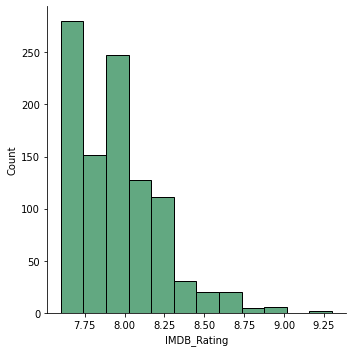

In [ ]:

sns.displot(dataTop1000["IMDB_Rating"],bins = 12, color = "seagreen")

**Top Genre rating**

In [ ]:
top_Genre_rates=data.groupby('Genre').mean().sort_values('IMDB_Rating',ascending=False).head(10)
top_Genre_rates = top_Genre_rates[['IMDB_Rating']].round(2)
top_Genre_rates.reset_index(inplace=True)
top_Genre_rates

,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
5,"Crime, Drama, Music",8.30
6,"Mystery, Romance, Thriller",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Drama, Fantasy, Horror",8.30
9,"Comedy, Musical, Romance",8.30


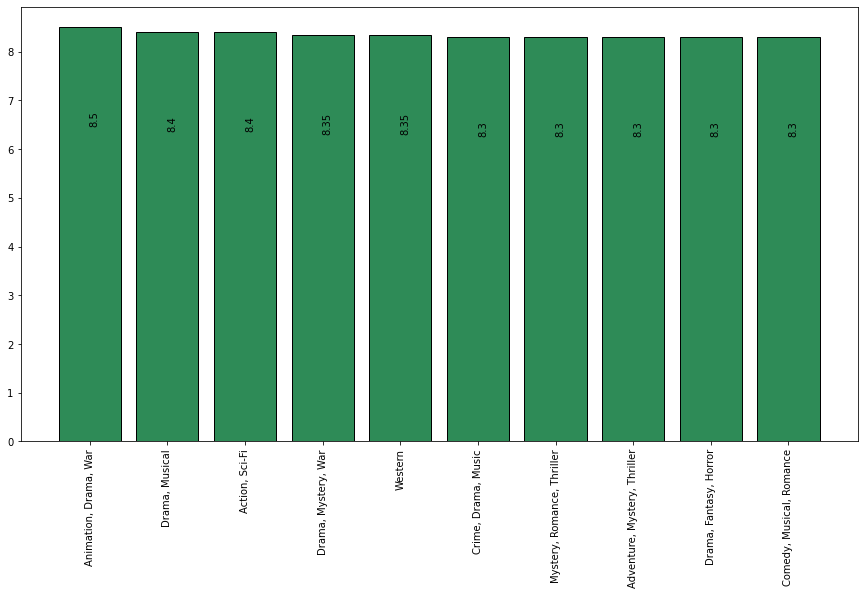

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(top_Genre_rates['Genre'],top_Genre_rates['IMDB_Rating'],color='seagreen',edgecolor='black' )
plt.xticks(rotation='vertical')
for k,v in top_Genre_rates['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=90)

**directors with the most appearances on the top 1000**

In [ ]:

top_directors = data["Director"].value_counts()
top_directors.head(10)

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: Director, dtype: int64

<AxesSubplot:xlabel='Director', ylabel='count'>

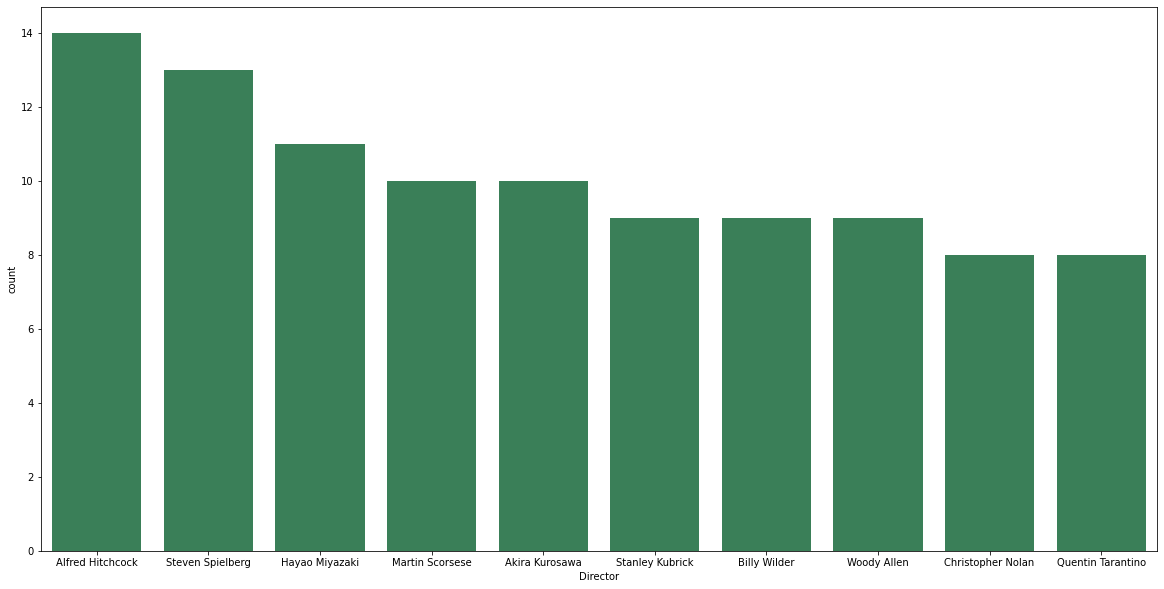

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Director',data=data,color='seagreen', order=data['Director'].value_counts().index[0:10])

**The most wgich has more movies**

In [ ]:
data['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

<AxesSubplot:xlabel='Released_Year', ylabel='count'>

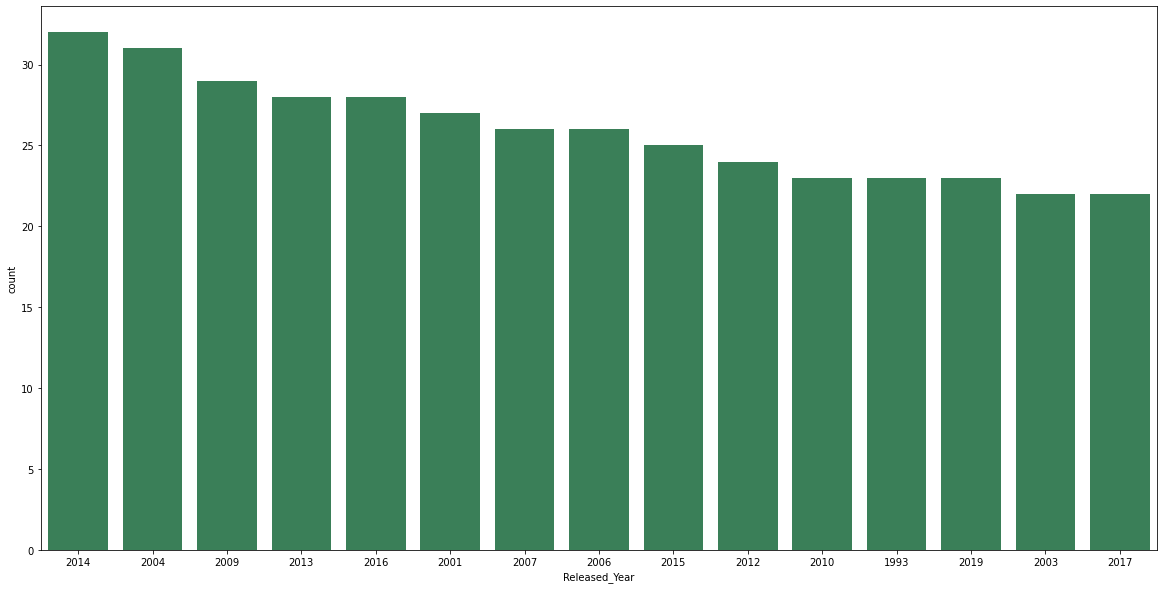

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Released_Year',data=data,color='seagreen', order=data['Released_Year'].value_counts().index[0:15])

**The Most Common Word in Movie Overviews**

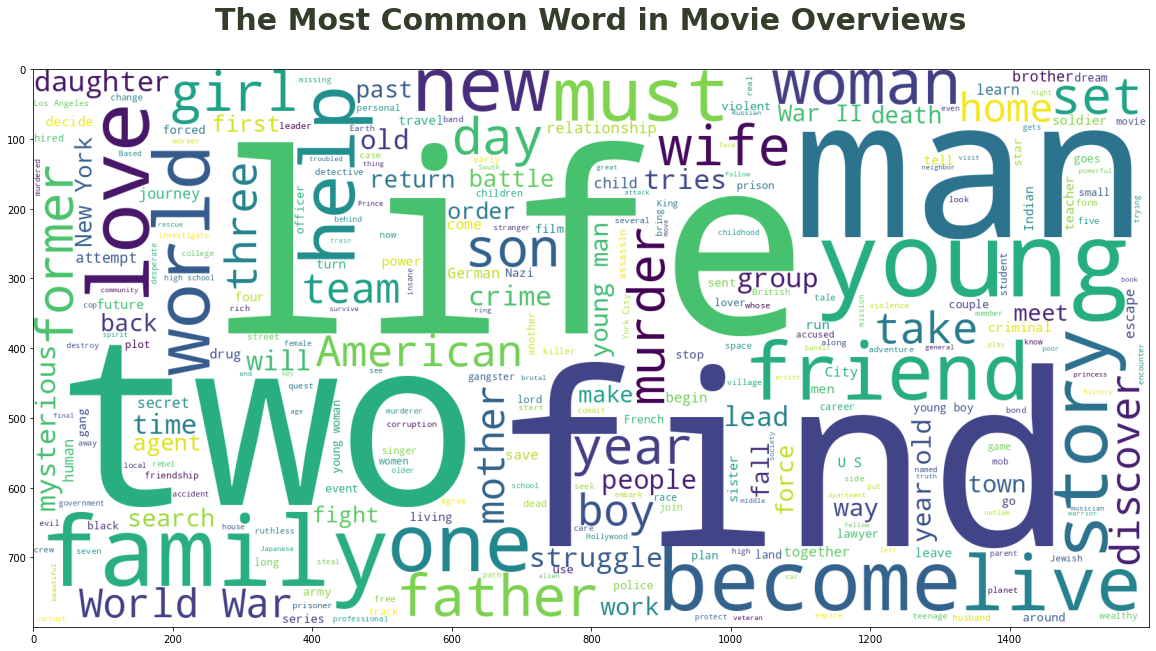

In [ ]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(data['Overview']))

plt.imshow(wc)

# Noting:

Word "life", "one", "find", "love" apparently appear in many occasions

**Percentage Ratio of Movie Genres**

(-1.25, 1.25, -1.25, 1.25)

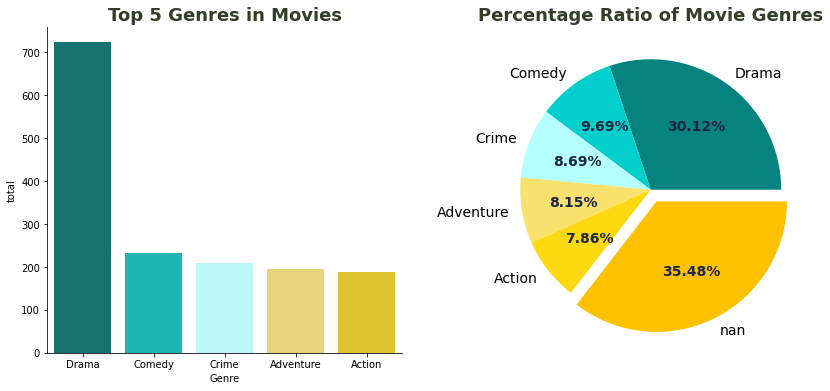

In [ ]:
genres_list = []
for i in data['Genre']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['Genre', 'total'])
ax = sns.barplot(data=df_plot, x='Genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['Genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

**Distributions of IMBD movies from 1920 -2018**

In [ ]:
fig = px.histogram(data_frame=data.sort_values(by='Released_Year'), x='Released_Year', 
                   color_discrete_sequence=['seagreen'])

fig.update_layout(font=dict(family='Lato', size=18, color='#333d29'), 
                  title=dict(text='<b>Distributions of IMBD movies from<b> 1920 -2018',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'white', plot_bgcolor='white',
                 xaxis = dict(title='Year of release', showgrid=False),
                 yaxis=dict(showgrid=False))

**Movies with highest Gross**

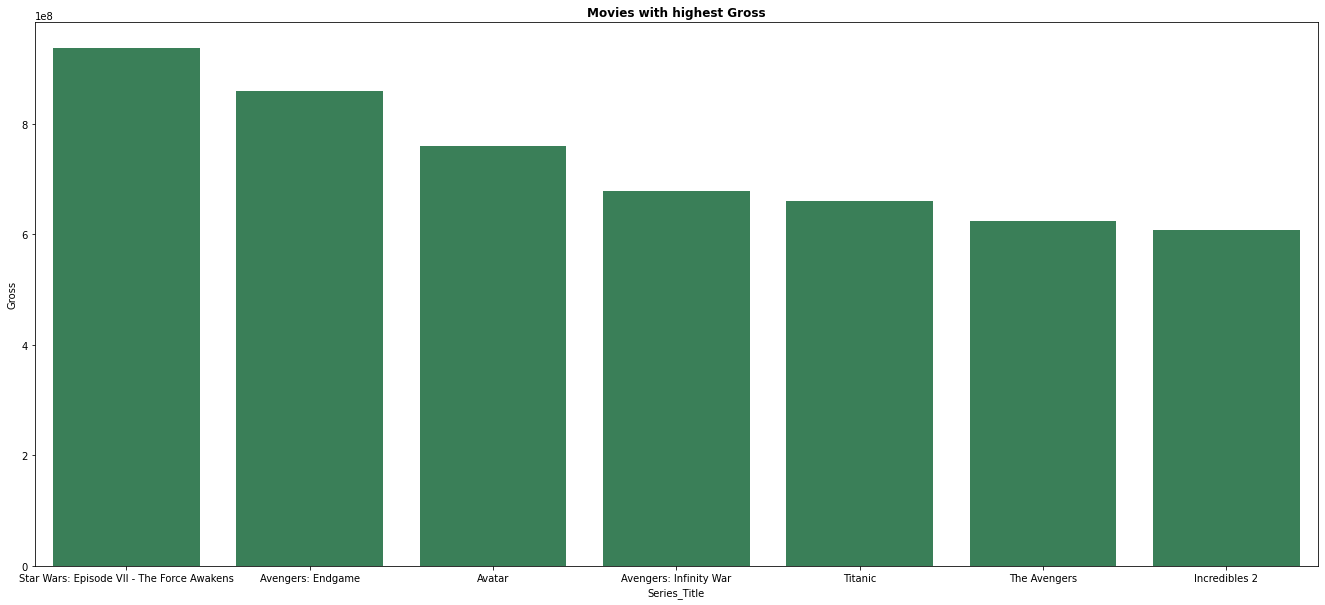

In [ ]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,10))
g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7],color='seagreen',)
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

**Top Voted Movies**

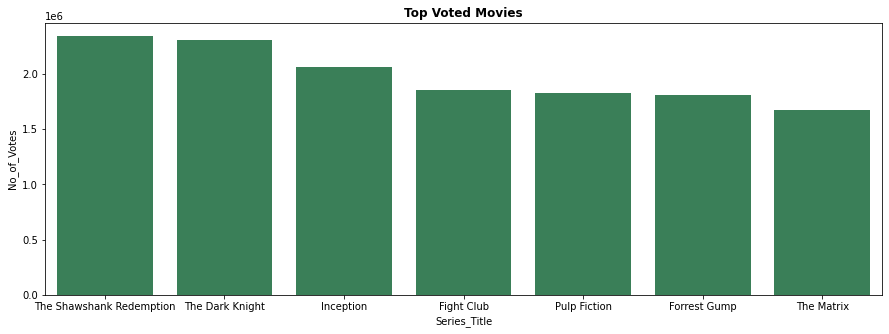

In [ ]:
top_voted = data.sort_values(['No_of_Votes'], ascending = False)
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7],color='seagreen' )
g.set_title("Top Voted Movies", weight = "bold")
plt.show()